In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('darkgrid')
warnings.simplefilter("ignore")

In [2]:
''' reading dataset '''
df = pd.read_csv('6 class csv.csv')

In [3]:
''' displaying five rows '''
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
''' unique variables count in columns spectral '''
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [5]:
''' shape of dataset '''
df.shape

(240, 7)

In [6]:
''' checking null values '''
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [7]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [8]:
''' unique variable counts in  star color '''
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

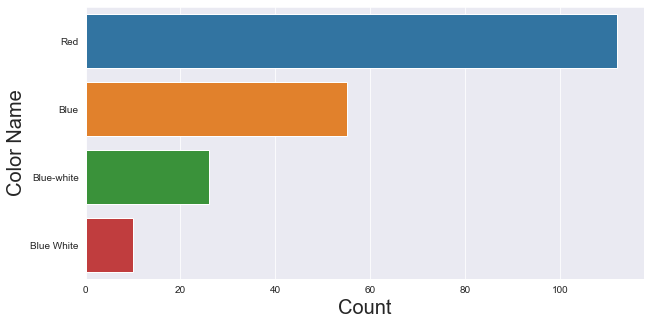

In [9]:
''' barplot '''
star_color_label = df['Star color'].value_counts().nlargest(4)
plt.figure(figsize=(10, 5))
sns.barplot(star_color_label, star_color_label.index);
plt.ylabel('Color Name', fontsize=20)
plt.xlabel('Count', fontsize=20);

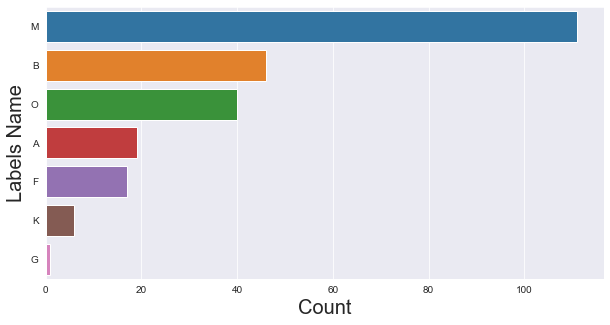

In [10]:
''' barplot '''
sp_class_label = df['Spectral Class'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(sp_class_label, sp_class_label.index);
plt.ylabel('Labels Name', fontsize=20)
plt.xlabel('Count', fontsize=20);

In [11]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


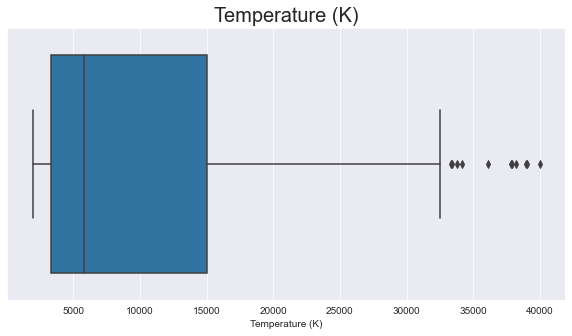

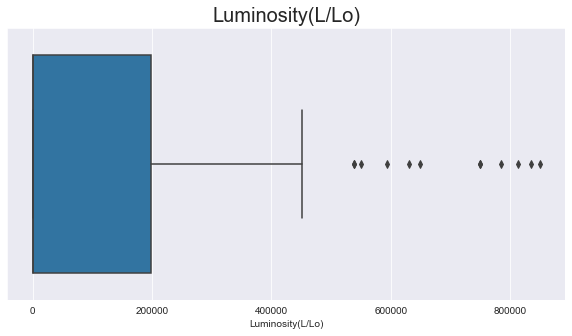

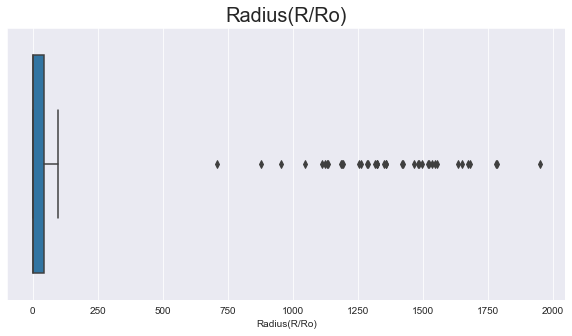

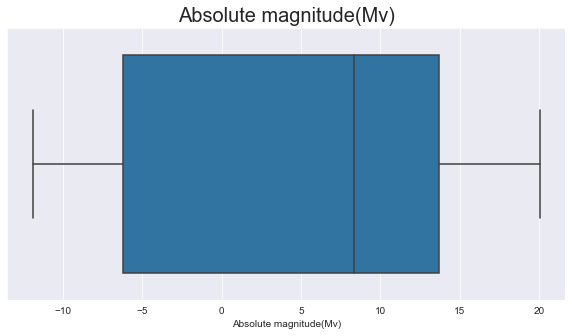

In [12]:
''' boxplot '''
for feature in ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature])
    plt.title(feature, fontsize=20)

<Figure size 720x360 with 0 Axes>

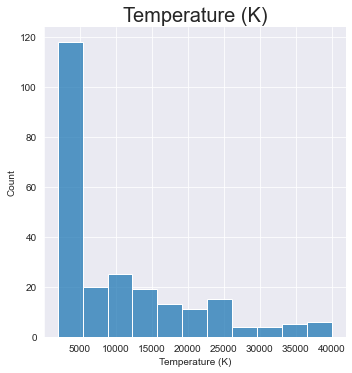

<Figure size 720x360 with 0 Axes>

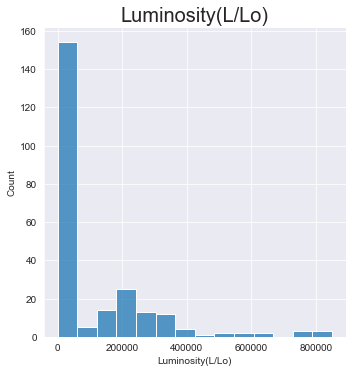

<Figure size 720x360 with 0 Axes>

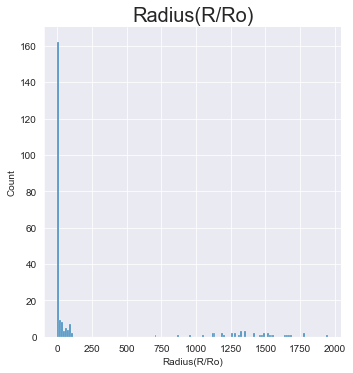

<Figure size 720x360 with 0 Axes>

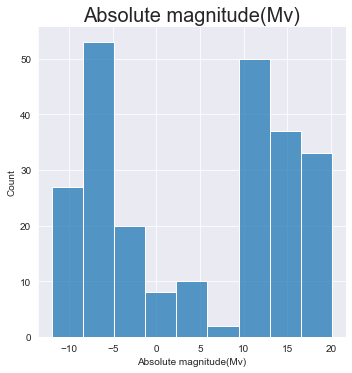

In [13]:
''' distribution plot '''
for feature in ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']:
    plt.figure(figsize=(10, 5));
    sns.displot(df[feature]);
    plt.title(feature, fontsize=20);

In [14]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [15]:
y = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]

In [16]:
''' converting start color and spectral class into label encoder '''
star_color_label = {value: key for key, value in enumerate(df['Star color'].unique())}
spec_class_label = {value: key for key, value in enumerate(df['Spectral Class'].unique())}

df['Star color'] = df['Star color'].map(star_color_label)
df['Spectral Class'] = df['Spectral Class'].map(spec_class_label)

In [17]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0


### **0: Red Dwarf, 1: Brown Dwarf, 2: White Dwarf, 3: Main Sequence ,4:  SuperGiants, 5: HyperGiants**

In [18]:
''' start types '''
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [19]:
''' independent and dependent variables '''
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']].values
y = df[['Star type']].values

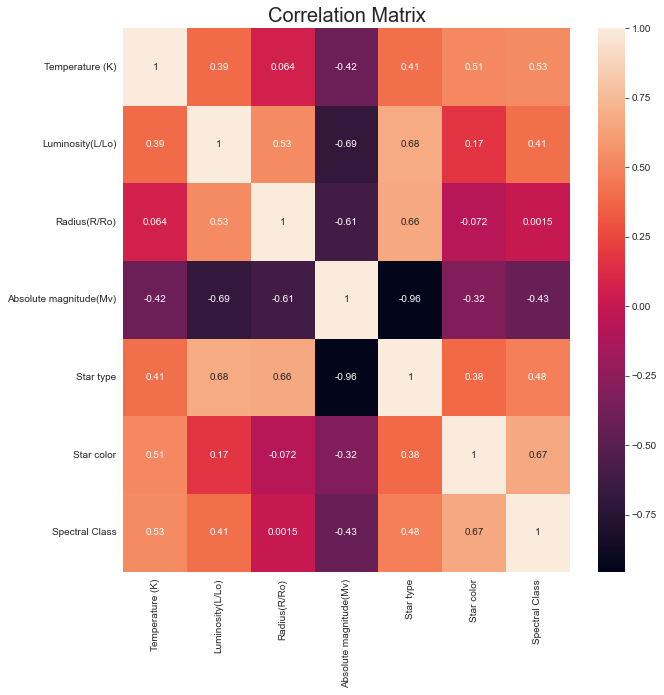

In [20]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [21]:
X

array([[ 3.06800e+03,  2.40000e-03,  1.70000e-01,  1.61200e+01,
         0.00000e+00,  0.00000e+00],
       [ 3.04200e+03,  5.00000e-04,  1.54200e-01,  1.66000e+01,
         0.00000e+00,  0.00000e+00],
       [ 2.60000e+03,  3.00000e-04,  1.02000e-01,  1.87000e+01,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 8.82900e+03,  5.37493e+05,  1.42300e+03, -1.07300e+01,
         2.00000e+00,  2.00000e+00],
       [ 9.23500e+03,  4.04940e+05,  1.11200e+03, -1.12300e+01,
         2.00000e+00,  2.00000e+00],
       [ 3.78820e+04,  2.94903e+05,  1.78300e+03, -7.80000e+00,
         6.00000e+00,  4.00000e+00]])

In [22]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
    

In [23]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
print("Xtrain shape: ", X_train.shape)
print("Xtest shape: ", X_test.shape)

Xtrain shape:  (192, 6)
Xtest shape:  (48, 6)


In [25]:
''' scaling of data '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
''' Logisctic Regression Model '''
lg = LogisticRegression()

''' fit on data '''
lg.fit(X_train, y_train)

LogisticRegression()

In [27]:
''' prediction '''
pred = lg.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

----------------------------------------------------------------------------------------------------

Accuracy Score:  1.0
----------------------------------------------------------------------------------------------------

Confusion Matrix: 



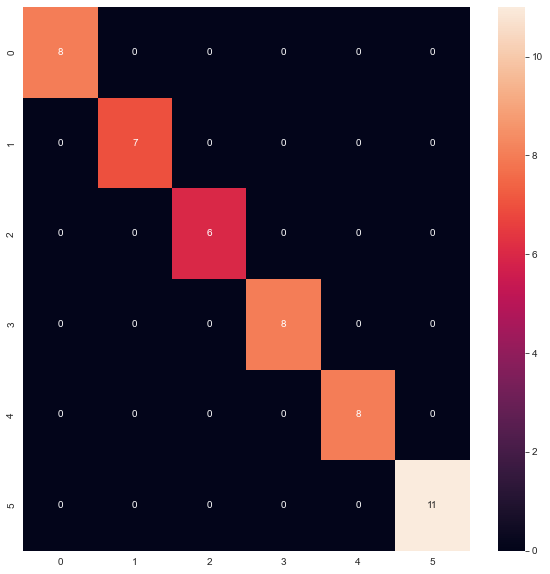

In [28]:
''' Performance of Model '''
y_test = y_test.reshape(48,) ## reshaping y_test

print('Classification Report: \n', classification_report(y_test, pred))
print("-" * 100)
print()

print('Accuracy Score: ', accuracy_score(y_test, pred))
print("-" * 100)
print()

print("Confusion Matrix: \n")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);